In [2]:
import numpy as np
import math
from matplotlib import pyplot as plt

In [3]:
def u(c):
    u_fun = lambda c: np.log(c)
    
    u = u_fun(c)
    
    return u

In [41]:
def actionvalue_allchoices(N, k_index, V_old, k_grid, beta):
    """
    input:
        k_index: index so that k_grid[index] corresponds to value of capital this period (state)
        V_old: approximation to the value function. V_old[i] approximates V(k_grid[i]).
    
    output:
        action_value: value of all possible state-action pairs.
    """
    
    k = k_grid[k_index]
    
    action_value = np.zeros((N,2))
    c = np.zeros_like(action_value)
    
    param_a = [0.9, 1.1]
    param_b = [0.3, 0.9] 
    delta = 1 # depreciation
                                 
    for s in range(2):
        for ii in range(N):
            c[ii,s] = param_a[s] * k ** 0.3 + param_b[s] * k + (1 - delta)*k - k_grid[ii] # consumption implied by policy k_next in state k
            if c[ii,s] <= 0:
                action_value[ii,s] = -999999 # set value to -HUGE for negative consumption
            else:
                action_value[ii,s] = u(c[ii,s]) + beta * ( 0.5*V_old[ii, 0] + 0.5*V_old[ii, 1] )
    
    return action_value

In [16]:
def vf_update(N, i, V_old, s, k_grid, beta):
    """
    input:
        i: index corresponding to the entry of the value-function vector which is updated
        V_old: value function vector from the previous iteration
        s: state S
    
    output:
        Vi_new: updated value for the value function vector at entry i.
    """
    Vi_new = max(actionvalue_allchoices(N, i, V_old, k_grid, beta)[:,s])
    
    return Vi_new

In [17]:
def vf_update_iteration(V_old,N,k_grid,beta):
    """
    input: 
        V_old: array with current approximation of the value function
    
    output:
        V_new: updated approximation of the value function
    """
    V_new = np.zeros_like(V_old)
    
    for ii in range(N):
        for s in range(2):
            V_new[ii,s] = vf_update(N, ii, V_old, s, k_grid,beta)
    
    return V_new

In [28]:
def solve_model(N_in, beta=0.9, max_iterations=10000, threshold=1e-5):
    
    beta = beta
    N = N_in      # number of grid-points for the capital grid
    k_low = 0.001 # lower bound for the capital grid
    k_high = 1    # upper bound for capital grid
    k_grid = np.linspace(k_low, k_high, N) #grid for capital
    
    difference_list = []
    
    V_init=np.zeros((N_in,2))
    V = V_init.copy()
    
    for iteration in range(max_iterations):
        print('Iteration: {}'.format(iteration + 1))

        V_new = vf_update_iteration(V,N,k_grid,beta)
        difference = np.max(np.abs(V - V_new))

        difference_list.append(difference)

        V = V_new.copy()

        if difference < threshold:
            print('Converged after iteration {}'.format(iteration + 1))

            plt.figure()
            plt.plot(k_grid, V[:, 0], label='Low')
            plt.plot(k_grid, V[:, 1], label='High')
            plt.xlabel('k')
            plt.ylabel('V(k)')
            plt.title('Value function after convergence')
            plt.legend()
            plt.show();
            break

        if iteration%N == 1:

            plt.figure()
            plt.plot(np.arange(1, iteration+2), np.log10(np.array(difference_list)))
            plt.xlabel('Iteration')
            plt.ylabel('Maximum update [log10]')
            plt.show();
    
    model = {}
    model['N'] = N
    model['V'] = V
    model['beta'] = beta
    model['kgrid'] = k_grid
    
    return model

In [36]:
def extract_policy(model):
    """
    input:
        V: value function array
    
    output:
        p: polcy function array
    """
    idx = np.zeros_like(model['V'])
    p = np.zeros_like(model['V'])
    
    for ii in range(model['N']):
        for s in range(2):
            idx = np.argmax(actionvalue_allchoices(model['N'], ii, model['V'], model['kgrid'],model['beta'])[:,s])
            p[ii,s] = model['kgrid'][idx]
    
    return p

In [37]:
def plot_policy(model):
    plt.figure()
    plt.plot(model['kgrid'], extract_policy(model)[:, 0], label='Low')
    plt.plot(model['kgrid'], extract_policy(model)[:, 1], label='High')
    plt.xlabel('k')
    plt.ylabel("k'")
    plt.title('Policy function')
    plt.legend()
    plt.show();

**Solution**

Iteration: 1
Iteration: 2


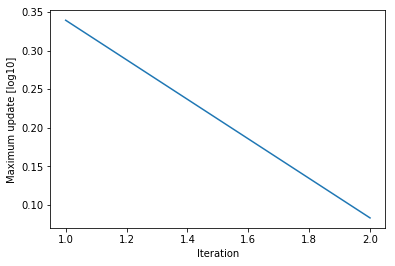

Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
Iteration: 51
Iteration: 52


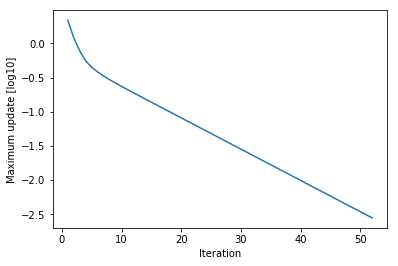

Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
Iteration: 71
Iteration: 72
Iteration: 73
Iteration: 74
Iteration: 75
Iteration: 76
Iteration: 77
Iteration: 78
Iteration: 79
Iteration: 80
Iteration: 81
Iteration: 82
Iteration: 83
Iteration: 84
Iteration: 85
Iteration: 86
Iteration: 87
Iteration: 88
Iteration: 89
Iteration: 90
Iteration: 91
Iteration: 92
Iteration: 93
Iteration: 94
Iteration: 95
Iteration: 96
Iteration: 97
Iteration: 98
Iteration: 99
Iteration: 100
Iteration: 101
Iteration: 102


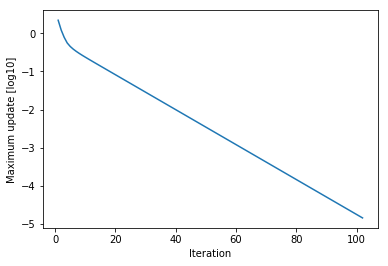

Iteration: 103
Iteration: 104
Iteration: 105
Iteration: 106
Converged after iteration 106


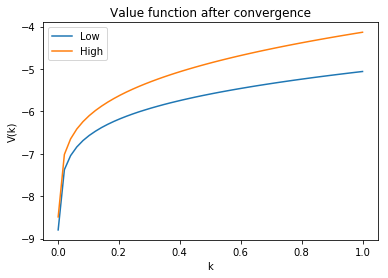

In [42]:
model_50 = solve_model(50)

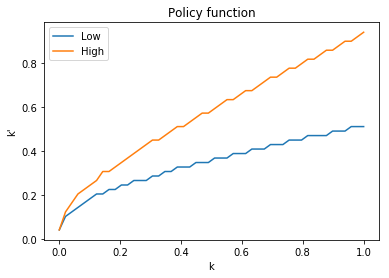

In [43]:
plot_policy(model_50)

Iteration: 1
Iteration: 2


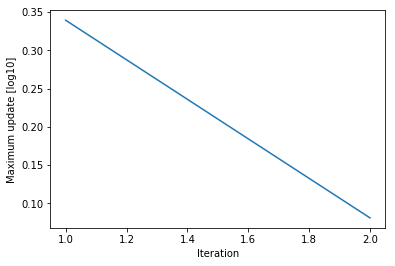

Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
Iteration: 71
Iteration: 72
Iteration: 73
Iteration: 74

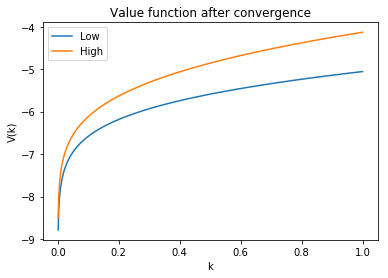

In [39]:
model_500 = solve_model(500)

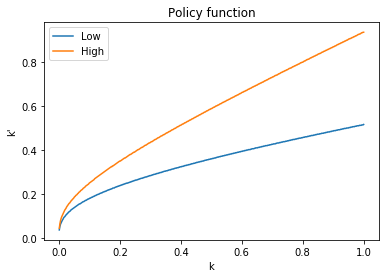

In [40]:
plot_policy(model_500)